# import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# get data

In [2]:
crime_data= read_csv('crime_data.csv')
crime_data.isna().sum()
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [3]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#   normalization of the given data 

In [4]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
crime_norm = pd.DataFrame(norm.fit_transform(crime_data.iloc[:,1:]))
crime_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# creating dendrogram for h_clustering

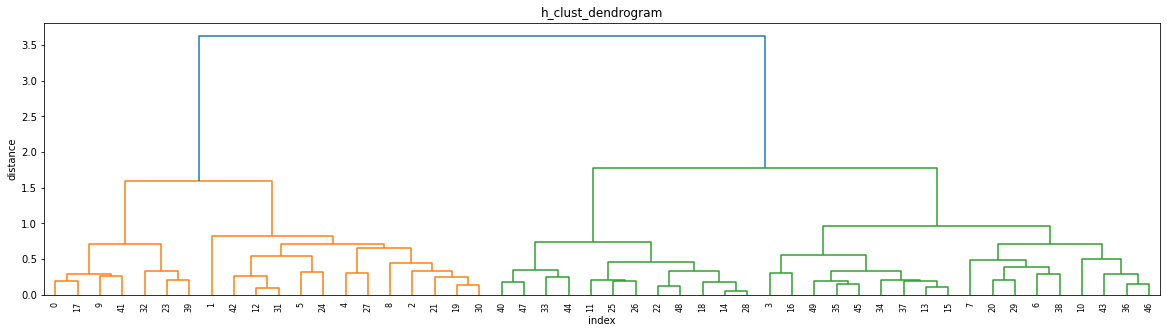

In [5]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
_linkage = linkage(crime_norm,method='ward',metric='euclidean')
plt.figure(figsize=(20,5))
plt.title('h_clust_dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(_linkage)
plt.show()


# hierarchial clustering

In [6]:
from sklearn.cluster  import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward').fit(crime_norm)
h_cluster_labels = h_cluster.labels_
h_cluster_labels=pd.Series(h_cluster_labels)


# concat the labels to the data 


In [7]:
crime_data['labels'] =h_cluster_labels

In [8]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


# grouping as per labels

In [9]:
crime_data.iloc[:,1:5].groupby(crime_data.labels).mean()

,Murder,Assault,UrbanPop,Rape
labels,,,,
0,6.055556,140.055556,71.333333,18.683333
1,10.815385,257.384615,76.000000,33.192308
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [10]:
cluster_0 = crime_data[crime_data.labels==0]
cluster_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [11]:
cluster_1 = crime_data[crime_data.labels==1]
cluster_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [12]:
cluster_2 = crime_data[crime_data.labels==2]
cluster_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [13]:
cluster_3 = crime_data[crime_data.labels==3]
cluster_3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


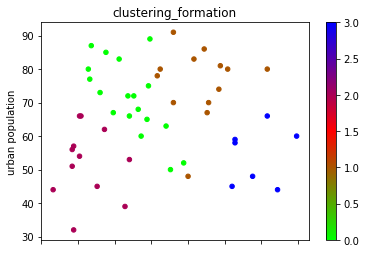

In [14]:
crime_data.plot(x='Murder',y='UrbanPop',c=h_cluster_labels,kind='scatter',cmap=plt.cm.brg_r)
plt.title('clustering_formation')
plt.xlabel('murder')
plt.ylabel('urban population')
plt.show()

# kmeans

In [15]:
crime_kmeans = crime_data.iloc[:,:5]
crime_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
from sklearn.cluster import KMeans

# deciding k value using elbow curve

### WCSS = With in Cluster Sum of Squares
###### Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

C:\Users\Rohith Challam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


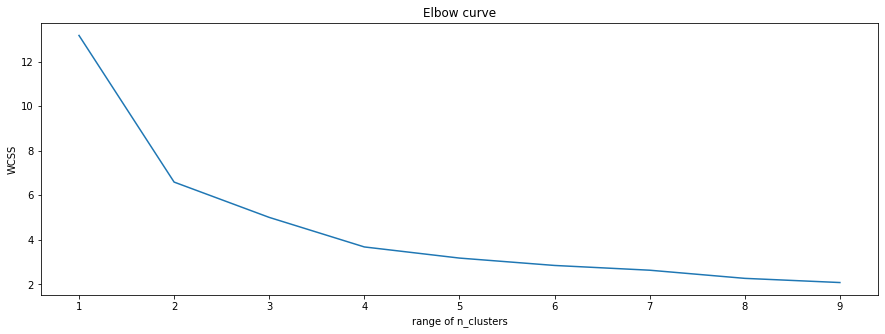

In [17]:
WCSS = []
for i in range(1,10):
    k_data=KMeans(n_clusters=i).fit(crime_norm)
    WCSS.append(k_data.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,10),WCSS)
plt.title('Elbow curve')
plt.xlabel('range of n_clusters')
plt.ylabel('WCSS')
plt.show()


##### k = 4 from the elbow curve

In [18]:
k_means_data = KMeans(n_clusters=4).fit(crime_norm)
k_means_data_labels = pd.Series(k_means_data.labels_)
k_means_data_labels

0     2
1     3
2     3
3     2
4     3
5     3
6     0
7     0
8     3
9     2
10    0
11    1
12    3
13    0
14    1
15    0
16    1
17    2
18    1
19    3
20    0
21    3
22    1
23    2
24    0
25    1
26    1
27    3
28    1
29    0
30    3
31    3
32    2
33    1
34    0
35    0
36    0
37    0
38    0
39    2
40    1
41    2
42    3
43    0
44    1
45    0
46    0
47    1
48    1
49    0
dtype: int32

In [19]:
crime_kmeans['k_labels']=k_means_data_labels
crime_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_labels
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


# grouping by labels

In [20]:
crime_kmeans.iloc[:,1:5].groupby(crime_kmeans.k_labels).mean()

,Murder,Assault,UrbanPop,Rape
k_labels,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.966667,264.000000,76.500000,33.608333


In [21]:
k_cluster_0 = crime_kmeans[crime_kmeans.k_labels==0]
k_cluster_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_labels
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0


In [22]:
k_cluster_1 = crime_kmeans[crime_kmeans.k_labels==1]
k_cluster_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_labels
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [23]:
k_cluster_2 = crime_kmeans[crime_kmeans.k_labels==2]
k_cluster_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_labels
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [24]:
k_cluster_3 = crime_kmeans[crime_kmeans.k_labels==3]
k_cluster_3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,k_labels
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3


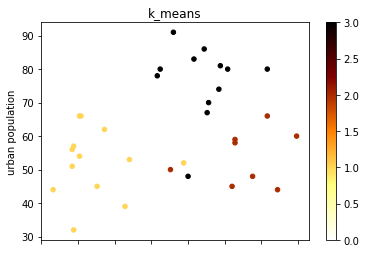

In [38]:
crime_kmeans.plot(x='Murder',y='UrbanPop',c=k_means_data_labels,kind='scatter',cmap=plt.cm.afmhot_r)
plt.title('k_means')
plt.xlabel('murder')
plt.ylabel('urban population')
plt.show()

# db scan

In [25]:
crime_dbscan = crime_data.iloc[:,:5]
crime_dbscan

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [26]:
from sklearn.cluster import DBSCAN
crime_db = DBSCAN(eps=0.3,min_samples=4).fit(crime_norm)
crime_db_labels = pd.Series(crime_db.labels_)
crime_db_labels

0     0
1    -1
2     1
3     1
4    -1
5    -1
6     1
7    -1
8    -1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    1
21    1
22    1
23    0
24    1
25    1
26    1
27   -1
28    1
29    1
30    1
31    1
32    0
33    1
34    1
35    1
36    1
37    1
38    1
39    0
40    1
41    0
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
dtype: int64

In [27]:
crime_dbscan['labels'] = crime_db_labels

In [28]:
crime_dbscan

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


# grouping as per labels

In [29]:
crime_dbscan.iloc[:,1:5].groupby(crime_dbscan.labels).mean()

,Murder,Assault,UrbanPop,Rape
labels,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,6.116216,140.837838,66.135135,18.710811


In [30]:
noise = crime_dbscan[crime_dbscan.labels== -1]
noise

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
27,Nevada,12.2,252,81,46.0,-1


In [31]:
cluster_db_1 = crime_dbscan[crime_dbscan.labels==0]
cluster_db_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [32]:
cluster_db_2 = crime_dbscan[crime_dbscan.labels==0]
cluster_db_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


# Estimating eps value using nearest neighbors

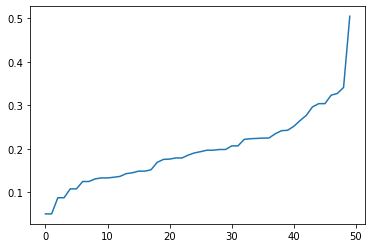

In [33]:
from sklearn.neighbors import NearestNeighbors
N = NearestNeighbors(n_neighbors=8).fit(crime_norm)
distances,indices = N.kneighbors(crime_norm)
distances =np.sort(distances , axis=0)
distances = distances[:,1]
plt.plot(distances)

# visualization of dbscan 

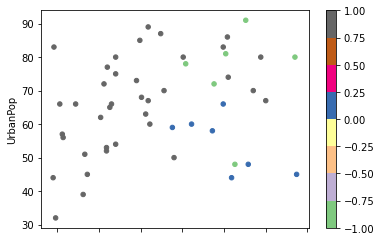

In [34]:
crime_dbscan.plot(x='Assault',y ='UrbanPop',c=crime_db_labels,kind = 'scatter', cmap =plt.cm.Accent)
plt.show()

# Finding silhoutte score 

In [35]:
from sklearn.metrics import silhouette_score
silhotte_dbscan =silhouette_score(crime_norm,crime_db_labels)
silhotte_dbscan

0.24738588099272626

In [36]:
silhotte_kmeans =silhouette_score(crime_norm,h_cluster_labels)
silhotte_kmeans

0.3298707379986785

In [37]:
silhotte_h_cluster =silhouette_score(crime_norm,k_means_data_labels)
silhotte_h_cluster

0.3408903560074363